<a href="https://colab.research.google.com/github/dusrbrla-mbb/kubig-portfolio/blob/temp/ml_exe_cf_main_book.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/Study/Jupyter/book'
# error_bad_lines 는, 패턴에 맞지 않는 row 가 있을 때 
# 에러를 발생시키지 않고 그 row 만 무시하는 옵션.
books = pd.read_csv(path + '/' + 'BX-Books.csv', encoding='latin-1', error_bad_lines=False, sep=';')
ratings = pd.read_csv(path + '/' + 'BX-Book-Ratings.csv', encoding='latin-1', error_bad_lines=False, sep=';')
users = pd.read_csv(path + '/' + 'BX-Users.csv', encoding='latin-1', error_bad_lines=False, sep=';')

Mounted at /content/drive


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 

In [2]:
combined = pd.merge(ratings, books)
combined.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...


In [4]:
#pvt = combined.pivot_table(index='User-ID', columns='Book-Title', values='Book-Rating').fillna(0)
#pvt.head()
## 에러 발생이 정상.

In [5]:
import numpy as np
user_len = len(np.unique(combined['User-ID']))
title_len = len(np.unique(combined['Book-Title']))
print(user_len, title_len, user_len * title_len)
# 협업 필터링 로직상, 연결고리가 적은 경우 의사결정 과정에
# 참여하는 비중이 낮기 때문에, 이를 제외할 수 있습니다.

92106 241071 22204085526


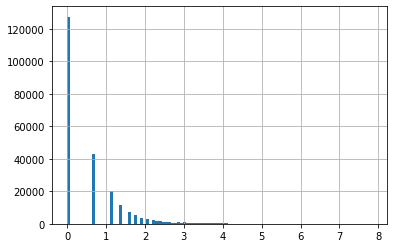

In [6]:
combined['count'] = 1
book_c = combined.groupby('Book-Title').agg(
    {'count' : np.sum}).sort_values(by='count').reset_index()
book_c['count'].apply(lambda x : np.log(x)).hist(bins=100)
# 책들의 절반(전체 24만건 중 12만건)이 1번밖에 선택받지 못함.
# 협업 필터링 알고리즘 상 이 책들은 의사결정 과정에 참여 X
# 연결고리가 몇 개 없는 책들을 의사결정 과정에서 배제 가능.
# 알고리즘의 특징을 전처리 과정에서 반영.

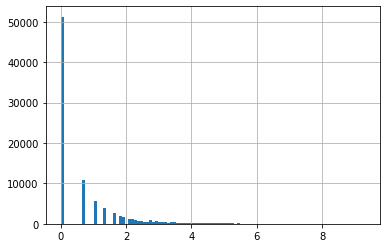

In [7]:
combined['count'] = 1
user_c = combined.groupby('User-ID').agg(
    {'count' : np.sum}).sort_values(by='count').reset_index()
user_c['count'].apply(lambda x : np.log(x)).hist(bins=100)
# 사용자들의 과반수(전체 9.2만건 중 5만건 이상)가 1번만 리뷰 남김.
# 협업 필터링 알고리즘 상 이 사용자들은 의사결정 과정에 참여 X
# 연결고리가 몇 개 없는 사용자들을 의사결정 과정에서 배제 가능.
# 알고리즘의 특징을 전처리 과정에서 반영.

In [8]:
pop_books = book_c.loc[book_c['count'] > 50]['Book-Title']
heavy_user = user_c.loc[user_c['count'] > 50]['User-ID']
b_filter = combined.loc[combined['Book-Title'].isin(pop_books)]
filtered = b_filter.loc[b_filter['User-ID'].isin(heavy_user)]
pvt = filtered.pivot_table(index='User-ID', columns='Book-Title', 
                     values='Book-Rating').fillna(0)
pvt.shape

(2975, 2381)

In [9]:
item_corr = pvt.corr()
item_corr

Book-Title,10 Lb. Penalty,16 Lighthouse Road,1984,1st to Die: A Novel,2010: Odyssey Two,204 Rosewood Lane,2061: Odyssey Three,24 Hours,2nd Chance,3rd Degree,...,YOU BELONG TO ME,Year of Wonders,You Belong To Me,You Shall Know Our Velocity,Young Wives,Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,Zoya,"\O\"" Is for Outlaw""","\Surely You're Joking, Mr. Feynman!\"": Adventures of a Curious Character""",stardust
Book-Title,,,,,,,,,,,,,,,,,,,,,
10 Lb. Penalty,1.000000,-0.003003,-0.007602,0.092481,-0.003967,-0.003333,0.043712,-0.003379,0.021720,-0.003315,...,-0.003451,-0.006083,-0.004176,-0.002724,-0.002481,-0.004967,-0.003461,0.030348,-0.003373,-0.003467
16 Lighthouse Road,-0.003003,1.000000,-0.008044,0.019262,0.105591,0.213818,-0.003541,-0.003576,0.151386,0.114569,...,-0.003652,-0.006437,0.070200,-0.002882,-0.002625,0.077467,-0.003662,0.043816,-0.003569,-0.003669
1984,-0.007602,-0.008044,1.000000,0.022345,0.053941,-0.008929,-0.008965,-0.001885,-0.015401,-0.002267,...,0.007472,0.036477,-0.002828,0.031127,0.010178,0.042759,0.028803,0.004457,0.002512,0.054529
1st to Die: A Novel,0.092481,0.019262,0.022345,1.000000,0.004241,-0.010940,-0.010983,0.079950,0.185102,0.110717,...,0.085803,0.018497,0.117690,0.018024,0.072141,0.022717,0.118489,0.076251,0.018104,0.036704
2010: Odyssey Two,-0.003967,0.105591,0.053941,0.004241,1.000000,-0.004659,0.218145,-0.004724,-0.011056,-0.004634,...,-0.004824,0.020893,-0.005837,-0.003808,-0.003468,0.066614,-0.004838,-0.008845,-0.004715,-0.004847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,-0.004967,0.077467,0.042759,0.022717,0.066614,-0.005833,-0.005856,0.018093,0.010703,0.016350,...,0.049948,-0.010646,0.020688,-0.004767,0.052007,1.000000,0.035656,-0.000018,0.089612,0.112053
Zoya,-0.003461,-0.003662,0.028803,0.118489,-0.004838,-0.004065,-0.004081,0.064358,0.020117,0.029981,...,0.150585,0.041572,0.111628,-0.003322,0.083526,0.035656,1.000000,0.059165,0.055298,0.064889
"\O\"" Is for Outlaw""",0.030348,0.043816,0.004457,0.076251,-0.008845,-0.007431,-0.007461,0.002238,0.044643,0.001626,...,0.015097,-0.013563,0.100314,0.050057,0.017407,-0.000018,0.059165,1.000000,0.008225,0.010588


In [10]:
target = '1984'
for title in item_corr.columns:
    if target in title:
        print(title)

1984


In [11]:
interested = '1984'
item_corr.sort_values(by=interested, 
                      ascending=False)[interested].head()

Book-Title
1984                                                                            1.000000
Animal Farm                                                                     0.208386
Lying Awake                                                                     0.181651
The Restaurant at the End of the Universe (Hitchhiker's Trilogy (Paperback))    0.167008
Brave New World                                                                 0.149764
Name: 1984, dtype: float64

In [12]:
user_corr = pvt.T.corr()
user_corr

User-ID,243,254,507,638,643,741,882,929,1211,1424,...,277928,277965,278026,278137,278144,278188,278418,278582,278633,278843
User-ID,,,,,,,,,,,,,,,,,,,,,
243,1.000000,-0.007126,-0.005440,0.091801,-0.001652,-0.001652,-0.006977,-0.005138,-0.002858,0.127669,...,-0.003671,-0.004589,0.040990,-0.004288,NaN,-0.005868,-0.005224,-0.005543,0.035178,-0.005715
254,-0.007126,1.000000,0.173639,-0.009949,-0.001813,-0.001813,-0.007655,-0.005638,-0.003136,-0.006234,...,-0.004028,-0.005035,-0.007958,-0.004705,NaN,-0.006438,-0.005733,-0.006083,-0.008322,0.073353
507,-0.005440,0.173639,1.000000,-0.007594,-0.001384,-0.001384,-0.005844,-0.004304,-0.002394,-0.004759,...,-0.003075,-0.003844,-0.006075,-0.003591,NaN,-0.004915,-0.004376,-0.004643,-0.006352,-0.004787
638,0.091801,-0.009949,-0.007594,1.000000,-0.002306,-0.002306,0.095319,-0.007173,0.112218,0.048350,...,-0.005125,0.035056,-0.010126,0.063138,NaN,-0.008192,0.050407,-0.007739,0.077971,-0.007979
643,-0.001652,-0.001813,-0.001384,-0.002306,1.000000,-0.000420,-0.001775,-0.001307,-0.000727,-0.001445,...,-0.000934,-0.001167,-0.001845,-0.001091,NaN,-0.001492,-0.001329,-0.001410,-0.001929,-0.001454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278188,-0.005868,-0.006438,-0.004915,-0.008192,-0.001492,-0.001492,-0.006303,-0.004642,-0.002582,-0.005133,...,-0.003317,-0.004146,-0.006553,-0.003874,NaN,1.000000,-0.004720,-0.005008,-0.006852,-0.005164
278418,-0.005224,-0.005733,-0.004376,0.050407,-0.001329,-0.001329,-0.005612,-0.004133,-0.002299,-0.004570,...,-0.002953,-0.003692,0.087615,-0.003449,NaN,-0.004720,1.000000,-0.004459,-0.006101,-0.004598
278582,-0.005543,-0.006083,-0.004643,-0.007739,-0.001410,-0.001410,-0.005955,-0.004385,-0.002440,-0.004850,...,-0.003134,-0.003917,0.108658,-0.003660,NaN,-0.005008,-0.004459,1.000000,-0.006473,-0.004878


In [13]:
interested = 254
user_corr.sort_values(by=interested, 
                      ascending=False)[interested].head()

User-ID
254       1.000000
108243    0.444596
212088    0.400287
119858    0.388723
183061    0.380489
Name: 254, dtype: float64

In [14]:
user_1, user_2 = 254, 108243
u1_title = set(combined.loc[combined['User-ID'] == user_1]['Book-Title'])
u2_title = set(combined.loc[combined['User-ID'] == user_2]['Book-Title'])
diff = u2_title.difference(u1_title)

In [15]:
u2_data = combined.loc[combined['User-ID'] == user_2]
u2_data.loc[u2_data['Book-Title'].isin(diff)].sort_values(
    by='Book-Rating', ascending=False)['Book-Title'].head()

3240                                          Growing Wings
446206              Sunchaser's Quest (Unicorns of Balinor)
791324    Dragons of a Lost Star (The War of Souls, Volu...
869944     The Secrets of the Scepter (Unicorns of Balinor)
582768    Dragons of a Fallen Sun (Dragonlance: The War ...
Name: Book-Title, dtype: object